In [1]:
from sympy import *
init_printing()
from IPython.display import display
from sympy.physics.matrices import msigma
from sympy.physics.quantum.dagger import Dagger
from sympy.physics.quantum import Ket, Bra
from sympy.physics.quantum.state import Wavefunction
from sympy.physics.quantum import TensorProduct as TP

# Problema 16

'avg_H1'

'avg_H2'

'avg_H1*avg_H2'

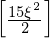

'avg_H1H2'

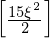

In [2]:
z = symbols('xi', real=True, positive=True)
Ket_1 = Matrix([[1],[0]])
Ket_2 = Matrix([[0],[1]])
Ket_11 = TP(Ket_1,Ket_1)
Ket_12 = TP(Ket_1,Ket_2)
Ket_21 = TP(Ket_2,Ket_1)
Ket_22 = TP(Ket_2,Ket_2)
psi_0_B=1/sqrt(6) *Ket_11 + 1/sqrt(3)* Ket_12 + 1/sqrt(6) *Ket_21 + 1/sqrt(3) * Ket_22

def E(n,q):
    return (n**2 + q**2)*z
H1 = Matrix([[E(1,0),0],[0,E(2,0)]])
H1_TP = TP(H1,eye(2))
H2 = Matrix([[E(0,1),0],[0,E(0,2)]])
H2_TP = TP(eye(2),H2)
def do_HW(psi):
    avg_H1 = Dagger(psi)*H1_TP*psi
    display('avg_H1', avg_H1)
    avg_H2 = Dagger(psi)*H2_TP*psi
    display('avg_H2', avg_H2)
    display('avg_H1*avg_H2', avg_H1*avg_H2)
    avg_H1H2 = Dagger(psi)*TP(H1,H2)*psi
    display('avg_H1H2', avg_H1H2)
do_HW(psi_0_B)
#Como el estado psi_0 es un producto tensorial, los valores esperados son iguales.

'avg_H1'

'avg_H2'

'avg_H1*avg_H2'

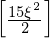

'avg_H1H2'

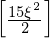

In [3]:
t,h = symbols('t hbar', real=True, positive=True)
t_vec_B = Matrix([[exp(-I*E(1,1)*t/h)],[exp(-I*E(1,2)*t/h)],[exp(-I*E(2,1)*t/h)],[exp(-I*E(2,2)*t/h)]])
psi_t=t_vec_B.multiply_elementwise(psi_0_B)
do_HW(psi_t)
#Es claro que es igual a cuando el ket no depende del tiempo.

'avg_H1'

'avg_H2'

'avg_H1*avg_H2'

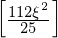

'avg_H1H2'

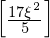

In [4]:
psi_0_D=1/sqrt(5) *Ket_11 + sqrt(3)/sqrt(5)* Ket_12 + 1/sqrt(5) *Ket_21
do_HW(psi_0_D)
#Como en este caso no se trata de un estado producto tensorial, el producto de los valores esperados no es igual al valor esperado del producto.

'avg_H1'

'avg_H2'

'avg_H1*avg_H2'

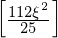

'avg_H1H2'

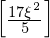

In [5]:
psi_t_D = t_vec_B.multiply_elementwise(psi_0_D)
do_HW(psi_t_D)

In [6]:
def do_HW_2(psi,t_vec=t_vec_B):
    rho_0 = psi*Dagger(psi)
    display('rho_0',rho_0)
    psi_t = t_vec.multiply_elementwise(psi)
    rho_t = psi_t*Dagger(psi_t)
    display('rho_t',rho_t)
    one_kets = [Ket_1, Ket_2]
    two_kets = [Ket_1, Ket_2]
    rho_1 = MutableMatrix(zeros(2))
    for n in range(2):
        for np in range(2):
            summ=0
            for p in range(2):
                summ += (Dagger(TP(one_kets[n],two_kets[p]))*rho_0*TP(one_kets[np],two_kets[p]))[0]
            rho_1[n,np]=summ
    display('rho_1',rho_1)

    rho_2 = MutableMatrix(zeros(2))
    for p in range(2):
        for pp in range(2):
            summ=0
            for n in range(2):
                summ += (Dagger(TP(one_kets[n],two_kets[p]))*rho_0*TP(one_kets[n],two_kets[pp]))[0]
            rho_2[p,pp] = summ
    display('rho_2',rho_2)
    display('rho1 x rho_2',TP(rho_1,rho_2))
    display('rho1 x rho_2 == rho_0',TP(rho_1,rho_2)==rho_0)



'rho_0'

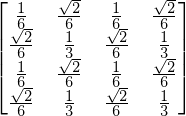

'rho_t'

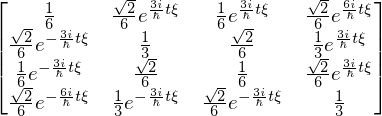

'rho_1'

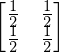

'rho_2'

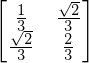

'rho1 x rho_2'

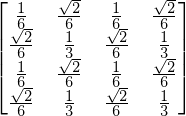

'rho1 x rho_2 == rho_0'

True

In [7]:
do_HW_2(psi_0_B)

'rho_0'

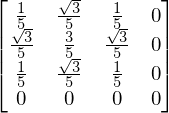

'rho_t'

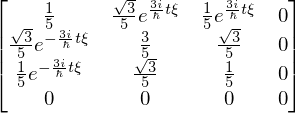

'rho_1'

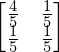

'rho_2'

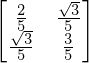

'rho1 x rho_2'

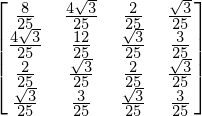

'rho1 x rho_2 == rho_0'

False

In [8]:
do_HW_2(psi_0_D)

# Problema 1

In [9]:
th, phi, w = symbols('theta phi omega', real=True)
chi_n_up = Matrix([[cos(th/2)],[sin(th/2)*exp(I*phi)]])
chi_n_dn = Matrix([[sin(th/2)],[-cos(th/2)*exp(I*phi)]])
sx_up = chi_n_up.subs(th,pi/2).subs(phi,0)
sx_dn = chi_n_dn.subs(th,pi/2).subs(phi,0)
sy_up = chi_n_up.subs(th,pi/2).subs(phi,pi/2)
sy_dn = chi_n_dn.subs(th,pi/2).subs(phi,pi/2)
sz_up = Matrix([[1],[0]])
sz_dn =Matrix([[0],[1]])
display('Px+', abs(Dagger(sx_up)*sz_up)**2)
display('Px-', abs(Dagger(sx_dn)*sz_up)**2)

'Px+'

'Px-'

'sx=+h/2'

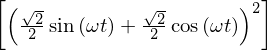

'sx=-h/2'

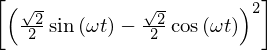

'sy=+h/2'

'sy=-h/2'

'sz=+h/2'

'sz=-h/2'

In [10]:
psi_t = cos(w*t)*sz_up + sin(w*t)*sz_dn
display('sx=+h/2',abs(Dagger(sx_up)*psi_t)**2)
display('sx=-h/2',abs(Dagger(sx_dn)*psi_t)**2)
display('sy=+h/2',abs(Dagger(sy_up)*psi_t)**2)
display('sy=-h/2',abs(Dagger(sy_dn)*psi_t)**2)
display('sz=+h/2',abs(Dagger(sz_up)*psi_t)**2)
display('sz=-h/2',abs(Dagger(sz_dn)*psi_t)**2)

In [11]:
T=2*pi/w
n=4
display('sx=+h/2',abs(Dagger(sx_up)*psi_t.subs(t,n*T))**2)
display('sx=-h/2',abs(Dagger(sx_dn)*psi_t.subs(t,n*T))**2)
display('sy=+h/2',abs(Dagger(sy_up)*psi_t.subs(t,n*T))**2)
display('sy=-h/2',abs(Dagger(sy_dn)*psi_t.subs(t,n*T))**2)
display('sz=+h/2',abs(Dagger(sz_up)*psi_t.subs(t,n*T))**2)
display('sz=-h/2',abs(Dagger(sz_dn)*psi_t.subs(t,n*T))**2)

'sx=+h/2'

'sx=-h/2'

'sy=+h/2'

'sy=-h/2'

'sz=+h/2'

'sz=-h/2'